In [1]:
import pandas as pd

# load data
df = pd.read_excel('4500 records.xlsx')

In [37]:
# sample = df.sample(n=15, random_state=1)

# Print the first 5 rows of the sample to verify
#print(sample.head())

# removing NA values from the dataframe df
df = df.fillna("")
print(df)

# removing all the blank rows
df1 = df.dropna(how='all')
print(df1)

                          job_name folder_name  Application  \
0       1PMCST_General_Ledger_load    SNOW_EDW  INFORMATICA   
1       1PMCST_General_Ledger_load    SNOW_EDW  INFORMATICA   
2       1PMCST_General_Ledger_load    SNOW_EDW  INFORMATICA   
3       1PMCST_General_Ledger_load    SNOW_EDW  INFORMATICA   
4       1PMCST_General_Ledger_load    SNOW_EDW  INFORMATICA   
...                            ...         ...          ...   
490341      MSTR_List_Jobs_Node_01         EDW        BI-DW   
490342      MSTR_List_Jobs_Node_01         EDW        BI-DW   
490343      MSTR_List_Jobs_Node_01         EDW        BI-DW   
490344      MSTR_List_Jobs_Node_01         EDW        BI-DW   
490345      MSTR_List_Jobs_Node_01         EDW        BI-DW   

       sub_application_name  duration avg_duration  cpu_time average_cpu_time  \
0                   Snow_DM      4068       3812.0      1921           2366.0   
1                   Snow_DM      3654       3812.0      2062           2366.0   


In [38]:

# Load the CSV file into a DataFrame
df = pd.read_excel('4500 records.xlsx')

# Convert the date columns to datetime format
df['start_datetime'] = pd.to_datetime(df['start_datetime'])
df['end_datetime'] = pd.to_datetime(df['end_datetime'])

# Sort the DataFrame by start time
df = df.sort_values('start_datetime')

# Create empty lists to store the data
job1_list = []
job2_list = []
start_time_list = []
end_time_list = []

# Iterate through the DataFrame and create pairs of jobs where the end time of one job is less than the start time of the next job
for i in range(len(df)-1):
    job1 = df.iloc[i]['job_name']
    job2 = df.iloc[i+1]['job_name']
    end_time = df.iloc[i]['end_datetime']
    start_time = df.iloc[i+1]['start_datetime']
    if end_time < start_time:
        job1_list.append(job1)
        job2_list.append(job2)
        start_time_list.append(start_time)
        end_time_list.append(end_time)

# Create a new DataFrame to store the pairs
pairs_df = pd.DataFrame({'job1': job1_list, 'job2': job2_list, 'start_time': start_time_list, 'end_time': end_time_list})

# Save the pairs DataFrame to a new CSV file
pairs_df.to_csv('job_pairs.csv', index=False)


In [42]:
!pip install apyori
from apyori import apriori
import pandas as pd
from mlxtend.frequent_patterns import association_rules
dataset=pd.read_csv('job_pairs.csv',header=None)
dataset.shape


#Convert pandas dataframe in a list of lists
records=[]
for i in range(0,len(dataset)):
    records.append([str(dataset.values[i,j]) for j in range(0,2)])

ap=apriori(records,min_support=0.005,min_confidence=0.2,min_lift=2,min_length=2,max_length=3)
ap_result=list(ap)
print(len(ap_result))
print(ap_result)


# if taken a tuple index 2 will be ordered_statistics in that 0 will be OrderedStatistic and
# in that 0 will be item_base and 1 will be item_add
# index 1 is support, [2][0][2] is confidence and [2][0][3] is lift
# putting output into a pandas dataframe


def inspect(ap_result):
    lhs         = [tuple(result[2][0][0])[0] for result in ap_result]
    rhs         = [tuple(result[2][0][1])[0] for result in ap_result]
    support    = [result[1] for result in ap_result]
    confidence = [result[2][0][2] for result in ap_result]
    lift       = [result[2][0][3] for result in ap_result]
   
    # returns a list of lists (zip actually connects lists as columns)
    return list(zip(lhs, rhs, support, confidence, lift))
ap_result_DataFrame = pd.DataFrame(inspect(ap_result), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support','Confidence','Lift'])
print(ap_result_DataFrame.to_string())

   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
6
[RelationRecord(items=frozenset({'6AM_GL_DM', '6AM_CD'}), support=0.006284367635506678, ordered_statistics=[OrderedStatistic(items_base=frozenset({'6AM_CD'}), items_add=frozenset({'6AM_GL_DM'}), confidence=0.75, lift=21.375)]), RelationRecord(items=frozenset({'6AM_CE_3NF', '6AM_HR_STG'}), support=0.007593610892903902, ordered_statistics=[OrderedStatistic(items_base=frozenset({'6AM_CE_3NF'}), items_add=frozenset({'6AM_HR_STG'}), confidence=0.6170212765957447, lift=28.736637259989624), OrderedStatistic(items_base=frozenset({'6AM_HR_STG'}), items_add=frozenset({'6AM_CE_3NF'}), confidence=0.3536585365853659, lift=28.736637259989624)]), RelationRecord(items=frozenset({'AR_SRC_TO_STG_LOAD', 'Common_Entities_3NF'}), support=0.015972767740246138, ordered_statistics=[OrderedStatistic(items_base=frozenset({'AR_SRC_TO_STG_LOAD'}), items_add=frozenset({'Common_Entities_3NF'}), confidence=0.52136752

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
        Left_Hand_Side      Right_Hand_Side   Support  Confidence       Lift
0               6AM_CD            6AM_GL_DM  0.006284    0.750000  21.375000
1           6AM_CE_3NF           6AM_HR_STG  0.007594    0.617021  28.736637
2   AR_SRC_TO_STG_LOAD  Common_Entities_3NF  0.015973    0.521368  21.642419
3  Account_Research_DM          Concur_Ctas  0.006808    0.388060  14.388350
4            Adobe_STG              Appo_DM  0.007594    0.256637  18.492403
5          Concur_Ctas            Adobe_STG  0.005761    0.213592   7.218661


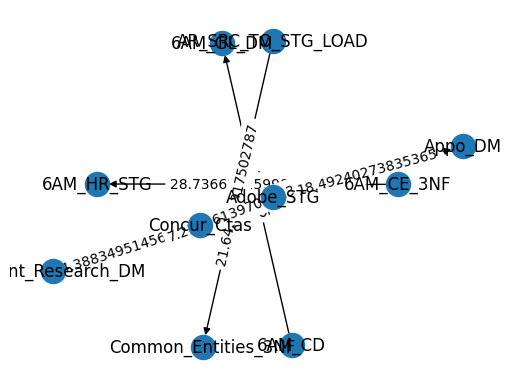

In [40]:

!pip install apyori
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
dataset=pd.read_csv('job_pairs.csv',header=None)

# Convert pandas dataframe in a list of lists
records=[]
for i in range(0,len(dataset)):
    records.append([str(dataset.values[i,j]) for j in range(0,2)])

# Generate the association rules using Apriori algorithm
ap=apriori(records,min_support=0.005,min_confidence=0.2,min_lift=2,min_length=1,max_length=2)
ap_result=list(ap)

# Convert the association rules to a Pandas dataframe
def inspect(ap_result):
    lhs = [tuple(result[2][0][0])[0] for result in ap_result]
    rhs = [tuple(result[2][0][1])[0] for result in ap_result]
    support = [result[1] for result in ap_result]
    confidence = [result[2][0][2] for result in ap_result]
    lift = [result[2][0][3] for result in ap_result]
    return pd.DataFrame(list(zip(lhs, rhs, support, confidence, lift)), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

# Draw the DAG
def draw_dag(df):
    # Create a directed graph
    G = nx.DiGraph()

    # Add the edges
    for i, row in df.iterrows():
        G.add_edge(row['Left_Hand_Side'], row['Right_Hand_Side'], weight=row['Lift'])

    # Position the nodes using Kamada-Kawai layout
    pos = nx.kamada_kawai_layout(G)

    # Draw the nodes and edges
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos, width=1)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

    # Show the plot
    plt.axis('off')
    plt.show()

# Call the functions to generate the association rules and draw the DAG
df = inspect(ap_result)
print(df.to_string())
draw_dag(df)